# Example - Vedení tepla v čase

# Modelování procesu vedení tepla v čase

## Textový popis
Tento projek se zabývá numerickou simulací procesu vedení tepla v pevných látkách. Konkrétně se jedná o modelování zjednodušené varianty 2D problému vedení tepla v čase.


Uvažujeme oblast tvaru obdélníku o stranách $a \times b$. 
V počátečním čase $t=0$ má každý bod oblasti určitou teplotu. Úkolem je modelovat průběh vedení tepla v čase, tedy spočítat teplotu v oblasti v časových krocích $t=dt$, $t=2dt$, $\ldots$, $t=Ndt$. Teplotu budeme reprezentovat pomocí funkce
$u:\mathbb{R}^{3}\rightarrow\mathbb{R}$,
hodnota $u\left(x,y,t\right)$ udává teplotu v bodě o souřadnicích
$\left(x,y\right)$ v čase $t$. 

Numerická simulace bude založena na fyzikální simulaci v jednotlivých časových krocích. Oblast diskretizujeme (rouzdělíme) na
shodné obdélníkové podoblasti o stranách $dx \times dy$.
Teplotu v každé podoblasti budeme reprezentovat pomocí hodnoty teploty ve středu této podoblasti. V každém časovém kroku poté spořítáme rozdíly teplot mezi sousedními podoblastmi (sdílejícími hranu) a tyto rozdíly přepočítáme do změny teploty v každé podoblasti. 

Změny teplot jsou zadány vztahem: 

$
u\left(x,y,t+dt\right)\approx u\left(x,y,t\right)+\frac{2}{\rho\left(x,y\right)c\left(x,y\right)}dt\left(\frac{u\left(x-dx,y,t\right)-u\left(x,y,t\right)}{\left(\frac{1}{\lambda\left(x,y\right)}+\frac{1}{\lambda\left(x-dx,y\right)}\right)dx^{2}}+
\frac{u\left(x,y+dy,t\right)-u\left(x,y,t\right)}{\left(\frac{1}{\lambda\left(x,y\right)}+\frac{1}{\lambda\left(x,y+dy\right)}\right)dy^{2}}+\frac{u\left(x+dx,y,t\right)-u\left(x,y,t\right)}{\left(\frac{1}{\lambda\left(x,y\right)}+\frac{1}{\lambda\left(x+dx,y\right)}\right)dx^{2}}+\frac{u\left(x,y+dy,t\right)-u\left(x,y,t\right)}{\left(\frac{1}{\lambda\left(x,y\right)}+\frac{1}{\lambda\left(x,y+dy\right)}\right)dy^{2}}\right),
$

kde $\lambda$ je součinitel tepelné vodivosti, $\rho$ je hustota a $c$ je měrná tepelná kapacita. Parametry $\lambda$, $\rho$ a $c$ budou zadány na vstupu jako matice o stejných rozměrech jako je diskretizace oblasti. $\rho$ a $c$ se vyskytují vždy pohromadě, proto budou na vstupu dohromady. Dalším vstupem bude také počáteční teplota v každé podoblasti.

Okrajové podmínky budou uvažováný jak tzv. nulové Neumannovy podmínky, tedy nepředpokládá se únik tepla mimo sledovanou oblast. Toto je automaticky splněno v našem případě, protože v každém časovém kroku se teplota v každé podoblasti přepočítává pouze z hodnot teploty v sousedních podoblastech.

## Funcionalita
- načtení vtupních dat ze souborů
- implementace jednoho kroku numerické simulace pomocí cyklu
- implementace kroku numerické simulace jako násobení maticí = sestavení této matice ve sparse formátu
- simulace vedení tepla v čase do zadaného časového horizontu
    - porovnání časové náročnosti obou implementací
- vykreslení teploty v libovolném čase
- vytvoření animace vedení tepla v čase a uložení do souboru



In [1]:
import projekt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from time import time as t

[1.0000000e+01 1.2585046e+06 2.9400003e+08           nan]
[1.000000e+01 1.131292e+10 6.174001e+14 6.213846e+14          nan]
[1.0000000e+01 1.0169463e+14 1.2965402e+21 1.3049436e+21 2.6014477e+21
           nan]
[1.0000000e+01 9.1415823e+17 2.7227344e+27 2.7403819e+27 8.1857749e+27
 8.2034223e+27           nan]
[1.0000000e+01 8.2175944e+21 5.7177424e+33 5.7548020e+33 2.2907870e+34
 2.2981990e+34 3.4417315e+34           nan]
[1.0000000e+01 7.3869987e+25           inf           nan]
[1.000000e+01 6.640356e+29          inf          nan]
[1.0000000e+01 5.9691804e+33           inf           nan]
[1.000000e+01 5.365844e+37          inf          nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan

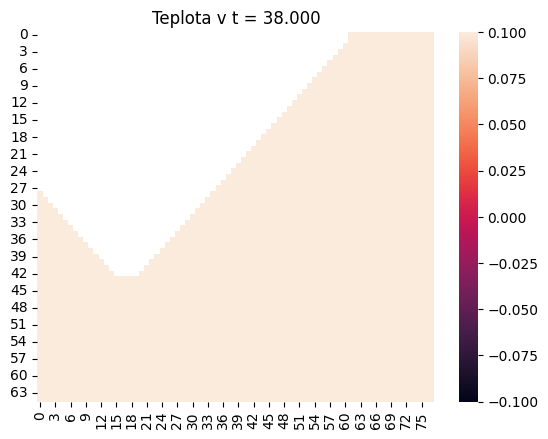

In [3]:
co = "spirala"

lam0 = np.load("spirala_RHO_c.npy")
rho0 = np.load("spirala_LAM.npy")
u0 = np.load("spirala_U_initial.npy")

S = projekt.Obrazec(u0,lam0,rho0)
start = 0
stop = 40
dt = 0.01
dx = 0.1
dy = 0.1

# postup = "sparse" pro matice ve sparse formatu
postup = "f"
projekt.run_u(S,co,postup,start,stop,dt,dx,dy)

In [4]:
projekt.porovnej(S,start,stop,dt,dx,dy)

[1.0000000e+01 1.2585046e+06 2.9400003e+08           nan]
[1.000000e+01 1.131292e+10 6.174001e+14 6.213846e+14          nan]
[1.0000000e+01 1.0169463e+14 1.2965402e+21 1.3049436e+21 2.6014477e+21
           nan]
[1.0000000e+01 9.1415823e+17 2.7227344e+27 2.7403819e+27 8.1857749e+27
 8.2034223e+27           nan]
[1.0000000e+01 8.2175944e+21 5.7177424e+33 5.7548020e+33 2.2907870e+34
 2.2981990e+34 3.4417315e+34           nan]
[1.0000000e+01 7.3869987e+25           inf           nan]
[1.000000e+01 6.640356e+29          inf          nan]
[1.0000000e+01 5.9691804e+33           inf           nan]
[1.000000e+01 5.365844e+37          inf          nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan]
[10. inf nan

[-20.          -0.06004099  -0.05989489  -0.05985951  -0.05981141
  -0.05960129  -0.05956375  -0.05939257  -0.05925541  -0.05918489
  -0.05904387  -0.05877483  -0.05834329  -0.05824467  -0.05814186
  -0.05800642  -0.05757131  -0.05752574  -0.05752139  -0.05751894
  -0.05735602  -0.05726971  -0.05720504  -0.05717032  -0.0570498
  -0.05689259  -0.05679847  -0.05669995  -0.05666127  -0.05662874
  -0.05657976  -0.05655345  -0.05644318  -0.05633577  -0.05602415
  -0.05594864  -0.05585371  -0.05579853  -0.05558049  -0.05551763
  -0.0555119   -0.05524071  -0.05444701  -0.05442426  -0.0542911
  -0.05410339  -0.0540755   -0.05403448  -0.05394246  -0.05373737
  -0.05353041  -0.05349285  -0.05337807  -0.05318069  -0.05312493
  -0.05262825  -0.05262805  -0.05253677  -0.05251158  -0.05239414
  -0.05231857  -0.05230412  -0.05194771  -0.05193884  -0.05190305
  -0.05188027  -0.05184918  -0.05175508  -0.05155624  -0.05143431
  -0.05134894   0.           0.05135741   0.05137283   0.05142806
   0.0514615

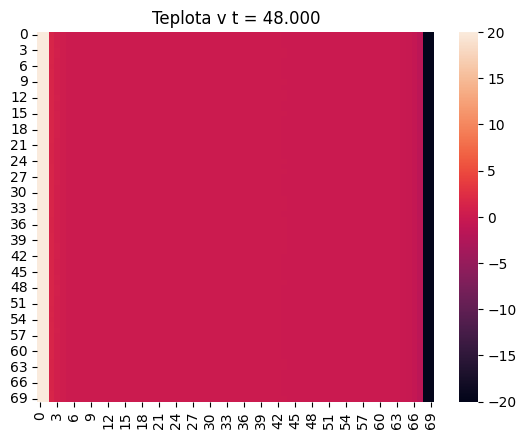

In [5]:
co = "cihla"

rho0 = np.load("cihly_RHO_c.npy")
lam0 = np.load("cihly_LAM.npy")
u0 = np.load("cihly_U_initial.npy")

S = projekt.Obrazec(u0,lam0,rho0)
start = 0
stop = 50
dx = 0.005
dy = 0.005
dt = 2.0

#postup = "sparse"
postup = "d"
#S.vypocti_u(start,stop,dt,dx,dy)
projekt.run_u(S,co,postup,start,stop,dt,dx,dy)

In [6]:
projekt.porovnej(S,start,stop,dt,dx,dy)

[-20.          -0.06004099  -0.05989489  -0.05985951  -0.05981141
  -0.05960129  -0.05956375  -0.05939257  -0.05925541  -0.05918489
  -0.05904387  -0.05877483  -0.05834329  -0.05824467  -0.05814186
  -0.05800642  -0.05757131  -0.05752574  -0.05752139  -0.05751894
  -0.05735602  -0.05726971  -0.05720504  -0.05717032  -0.0570498
  -0.05689259  -0.05679847  -0.05669995  -0.05666127  -0.05662874
  -0.05657976  -0.05655345  -0.05644318  -0.05633577  -0.05602415
  -0.05594864  -0.05585371  -0.05579853  -0.05558049  -0.05551763
  -0.0555119   -0.05524071  -0.05444701  -0.05442426  -0.0542911
  -0.05410339  -0.0540755   -0.05403448  -0.05394246  -0.05373737
  -0.05353041  -0.05349285  -0.05337807  -0.05318069  -0.05312493
  -0.05262825  -0.05262805  -0.05253677  -0.05251158  -0.05239414
  -0.05231857  -0.05230412  -0.05194771  -0.05193884  -0.05190305
  -0.05188027  -0.05184918  -0.05175508  -0.05155624  -0.05143431
  -0.05134894   0.           0.05135741   0.05137283   0.05142806
   0.0514615